In [1]:
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'stats_standard'})[0]

In [2]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4  Keyliane Abdallah             fr FRA                 FW   
4                  5   Yunis Abdelhamid             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League                 23   
1       Union Berlin       de Bundesliga                 22   
2     Eint Frankfurt       de Bundesliga                 19   
3          Marseille          fr Ligue 1                 17   
4              Reims          fr Ligue 1                 35   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           20     13  ...           0.07  0.07  0.00   
1               2000           30     14  ...           0.14  0.28  0.14   
2               2003            7      1  ...           0.89  0.89  0.00   
3               2006            1      0  ...           0.00  0.00  0.00   
4               1987           31     31  ...           0.00  0.13  0.10   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.07  0.00  0.06   0.06  0.00     0.06             Matches  
1   0.28  0.14  0.13   0.27  0.14     0.27             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.00  0.00  0.00   0.00  0.00     0.00             Matches  
4   0.10  0.11  0.01   0.12  0.09     0.09             Matches  

[5 rows x 38 columns]

In [3]:
# You might notice that the column names are a bit weird, let's fix that

# We'll get rid of the per 90 columns and we will recalculate the ones we are interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]


In [6]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,...,1,0,0.0,0.0,0.8,0.9,22,43,26,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,3,1,2.0,2.0,1.9,3.8,37,56,91,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,...,0,0,0.1,0.1,0.1,0.2,2,5,7,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,...,5,0,3.4,2.6,0.3,2.9,36,137,9,Matches
5,6,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23,2000,27,17,...,2,0,0.8,0.8,0.5,1.3,9,78,20,Matches
6,7,Nabil Aberdin,fr FRA,DF,Getafe,es La Liga,20,2002,2,2,...,0,0,0.0,0.0,0.0,0.0,0,7,0,Matches
7,8,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30,1993,33,32,...,4,0,1.1,1.1,2.2,3.3,38,194,51,Matches
8,9,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20,2003,22,12,...,1,0,3.8,3.8,2.0,5.8,28,20,87,Matches
9,10,Abner,br BRA,DF,Betis,es La Liga,23,2000,23,15,...,3,0,0.1,0.1,1.0,1.1,14,33,58,Matches


In [9]:
# We Are only going to be looking at FWs so we will filter the data to only include those players
# As well we only want to be looking at player who have played more than 400 minutes

# The reason we are only looking at FWs is because we want to compare players who play in similar positions
# The reason we are only looking at players who have played more than 400 minutes is because we want to compare players who have played a significant amount of time and we don't want to inflate stats of players by comparing them to players who have played very little
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'].astype(int) > 400]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,3,1,2.0,2.0,1.9,3.8,37,56,91,Matches
8,9,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20,2003,22,12,...,1,0,3.8,3.8,2.0,5.8,28,20,87,Matches
10,11,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23,2000,13,9,...,2,0,2.8,2.0,0.2,2.2,23,20,75,Matches
17,18,Bénie Adama Traore,ci CIV,"FW,MF",Nantes,fr Ligue 1,20,2002,14,4,...,1,1,0.7,0.7,0.9,1.6,23,15,45,Matches
18,19,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,23,2000,32,27,...,2,0,12.4,12.4,1.9,14.3,40,17,127,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,2828,Alessio Zerbin,it ITA,"DF,FW",Monza,it Serie A,24,1999,13,7,...,2,1,0.4,0.4,0.8,1.2,17,20,46,Matches
2946,2834,Edon Zhegrova,xk KVX,FW,Lille,fr Ligue 1,24,1999,33,25,...,3,1,6.2,6.2,6.2,12.4,110,90,322,Matches
2951,2839,Joshua Zirkzee,nl NED,FW,Bologna,it Serie A,22,2001,34,32,...,8,0,9.0,7.4,5.2,12.6,53,86,182,Matches
2962,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33,1990,20,13,...,2,0,4.5,2.2,1.2,3.4,3,15,33,Matches


In [10]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].astype(float)
df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [11]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [13]:
# We'll calculate the percentiles for each of these columns
# We will also name them as we want to see them in the radar plot
df['Goals'] = (df['goals_per_90'].rank(pct=True) * 100).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True) * 100).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True)  * 100).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)

In [14]:
from mplsoccer import Radar

In [15]:
# Let's plot a radar for Mbappe
Zakaria = df[df['Player'] == 'Zakaria Aboukhlal']
Zakaria

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
10,11,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23,2000,13,9,...,2.380952,8.928571,69,10,45,66,2,64,40,81


In [16]:
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists', 'Expected Goals', 
    'Expected Assists', 'Progressive Carries', 'Progressive Passes', 'Progressive Receptions'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ')

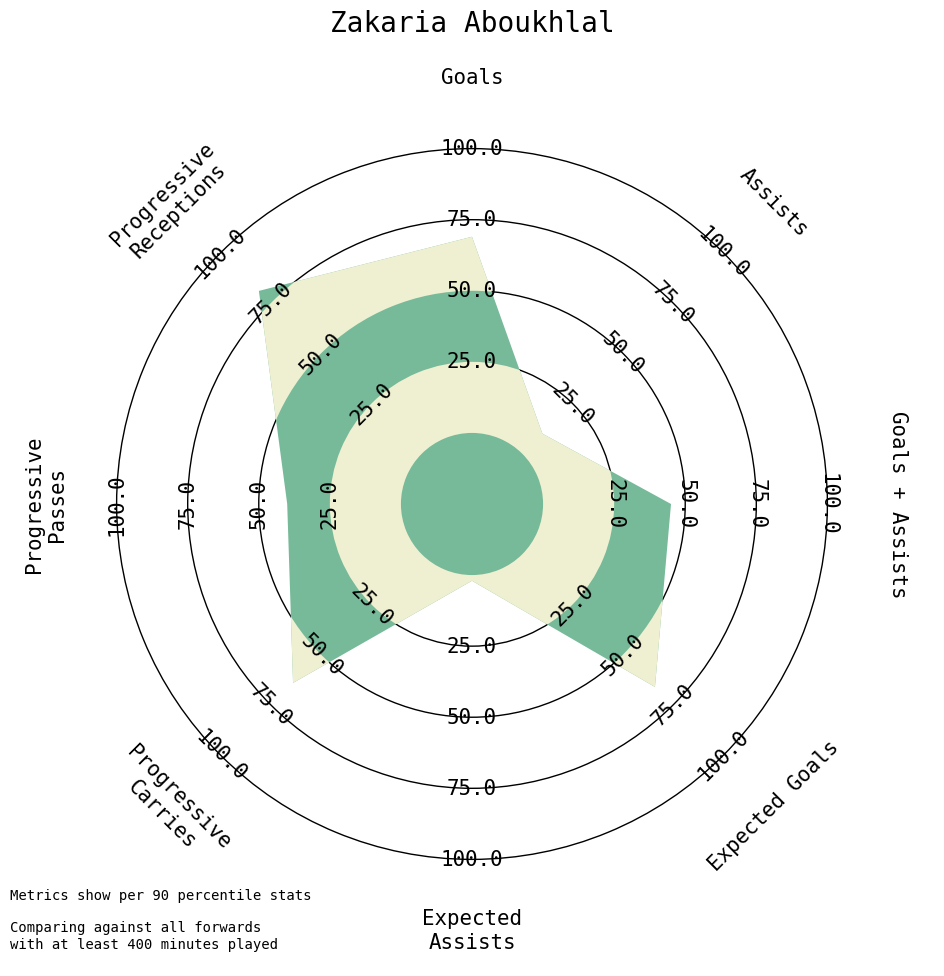

In [25]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=Zakaria[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#77BA99'},
    kwargs_rings={'facecolor': '#EFF0D1'}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Zakaria Aboukhlal', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [38]:
# Now let's compare two players
# We'll compare Mbappe and Haaland
Aaronson = df[df['Player'] == 'Brenden Aaronson']
Aaronson

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,3.971631,6.453901,27,55,31,19,49,61,77,50


Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@OUSSAMA-BOUTROUFT')

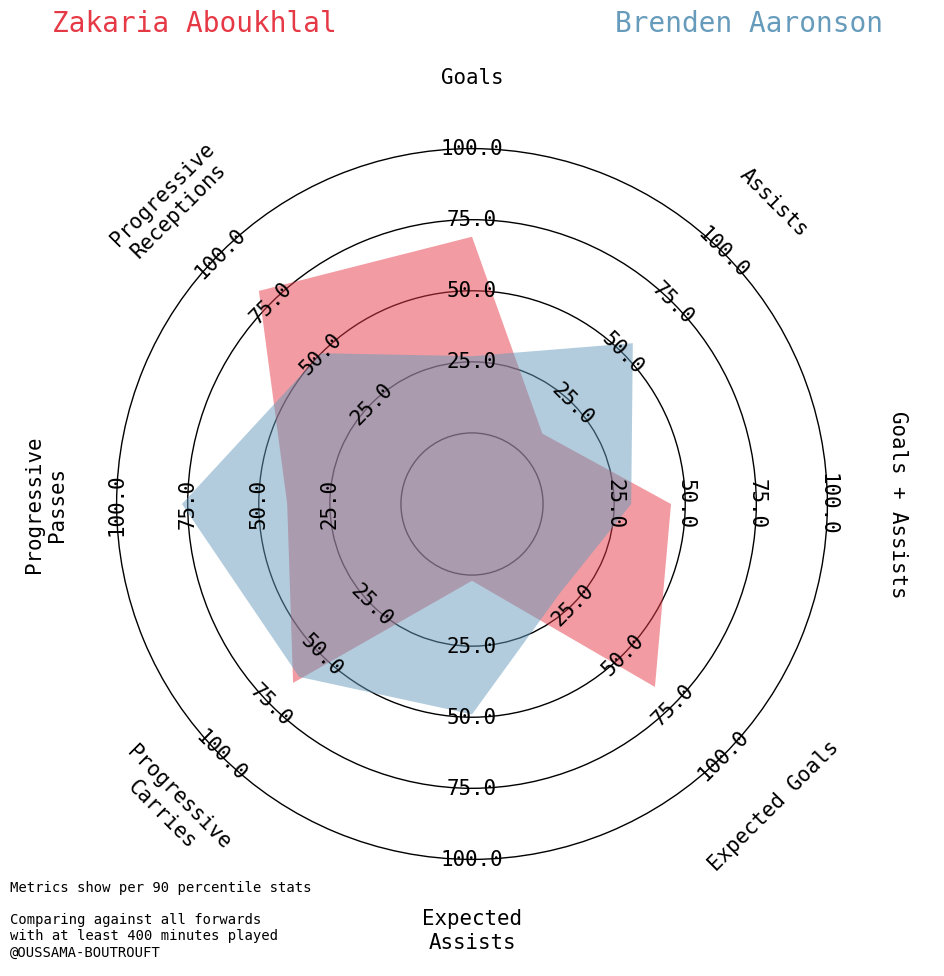

In [40]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=Zakaria[columns_to_plot].values.flatten().tolist(),
    compare_values=Aaronson[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.5},
    kwargs_compare={'facecolor': '#669bbc', 'alpha': 0.5}
)


range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s='Zakaria Aboukhlal', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#e63946'
)

ax.text(
    x=0.8, y=1.02, s='Brenden Aaronson', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#669bbc'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played\n@OUSSAMA-BOUTROUFT', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)